# Ad Click Prediction Project

Motivation: 

Dataset:



In [1]:
## Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Importing the files
train_data_raw=pd.read_csv("Data/train.csv")

In [3]:
train_data_raw.shape

(12137810, 10)

In [4]:
## Displaying a part of the train data
train_data_raw.head(5) 

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [5]:
## Number of records in train data
n_records_train = len(train_data_raw)

print("Total number of records in train data: {}".format(n_records_train))

Total number of records in train data: 12137810


Since the dataset is too large, my hardware's limited capability makes it extremely difficult to handle and train all of these data. As a result, I reduced the dataset by limiting the data to a single merchant and reconstructed my dataset as below.

In [6]:
train_data=train_data_raw.loc[train_data_raw['merchant'] == 39507200]

In [7]:
## Displaying a part of the reduced train data
train_data.head(5) 

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
465,IDANdp4FF,2017-01-14 11:25:25,357752.0,498861,12052,39507200,b,Google Chrome,Mobile,0
2241,IDuWyZH2g,2017-01-18 15:32:20,4646416.0,20025,12052,39507200,b,Edge,Tablet,0
2299,IDy86CPzM,2017-01-11 12:41:35,9652480.0,999876,12052,39507200,a,Google Chrome,Mobile,0
3337,IDzIlMAb8,2017-01-16 15:00:23,1043601.0,237378,12052,39507200,a,Firefox,Mobile,0


In [8]:
train_data.shape

(29920, 10)

In [9]:
print("Total number of records in train data: {}".format(len(train_data)))

Total number of records in train data: 29920


With this reduced dataset, it will increase the feasibility of training my model on my hardware.

Now check for missing values per column and fill them with -999 for integer datatype and 'None' for string datatype. Perform the same operation for both train and test dataset.

In [10]:
train_data.isnull().sum(axis=0)/train_data.shape[0]

ID             0.000000
datetime       0.000000
siteid         0.101437
offerid        0.000000
category       0.000000
merchant       0.000000
countrycode    0.000000
browserid      0.049933
devid          0.151270
click          0.000000
dtype: float64

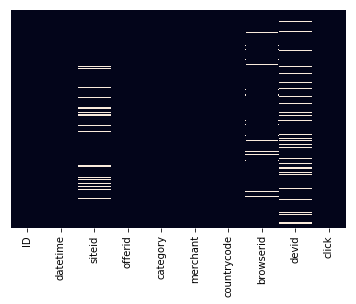

In [11]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [12]:
train_data['browserid'].fillna("None", inplace=True)

train_data['siteid'].fillna(-999, inplace=True)

train_data['devid'].fillna("None", inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Now, convert datetime to a pandas-readable type and then extract hours and weekdays. Since the dataset contains only ads from the month of January 2017, only weekday (Sunday=0, Monday=1, etc.) and hours information are necessary to obtain. Peform the same operation on both training and testing dataset. 

In [13]:
## Set datatime

train_data['datetime'] = pd.to_datetime(train_data['datetime'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
## Create datetime variable

train_data['tweekday'] = train_data['datetime'].dt.weekday
train_data['thour'] = train_data['datetime'].dt.hour

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Transformed dataset should contain columns 'tweekday' and 'thour'

In [15]:
train_data.head(5)

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,tweekday,thour
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0,5,16
465,IDANdp4FF,2017-01-14 11:25:25,357752.0,498861,12052,39507200,b,Google Chrome,Mobile,0,5,11
2241,IDuWyZH2g,2017-01-18 15:32:20,4646416.0,20025,12052,39507200,b,Edge,Tablet,0,2,15
2299,IDy86CPzM,2017-01-11 12:41:35,9652480.0,999876,12052,39507200,a,Google Chrome,Mobile,0,2,12
3337,IDzIlMAb8,2017-01-16 15:00:23,1043601.0,237378,12052,39507200,a,Firefox,Mobile,0,0,15


Now breakdown the datasets to features and target. For feature engineering purposes, drop columns 'ID', 'merchant' (unncessary with no value for our prediction), 'datetime' (already extracted to 'tweekday' and 'thours'), and click (target variable). Also, the features should be encoded before training our model.

In [16]:
target = train_data['click']
train_data.drop(train_data.columns[[0,1,5,9]], axis=1, inplace=True)

## feature_raw has data which is not yet encoded
features_raw = train_data.copy()

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
## Check to see if the length match
print(len(features_raw))
print(len(target))

29920
29920


Use Label Encoding method for encoding the features for training. 

In [18]:
from sklearn.preprocessing import LabelEncoder

features = features_raw.apply(LabelEncoder().fit_transform)

In [19]:
features

,siteid,offerid,category,countrycode,browserid,devid,tweekday,thour
4,2152,1247,0,3,8,0,5,16
465,146,1305,0,1,3,1,5,11
2241,1769,51,0,1,1,3,2,15
2299,3635,2527,0,0,3,1,2,12
3337,389,603,0,0,2,1,0,15
3654,3308,1353,0,1,2,1,3,12
4382,349,2524,0,0,2,2,2,17
5462,1661,1582,0,0,3,1,3,18
6209,588,777,0,1,2,1,4,9
6935,1129,253,0,0,2,1,1,17


Below are the descriptive statistics of features dataframe.

In [20]:
features.describe()

,siteid,offerid,category,countrycode,browserid,devid,tweekday,thour
count,29920.000000,29920.000000,29920.0,29920.000000,29920.000000,29920.000000,29920.000000,29920.000000
mean,1590.506852,1251.756049,0.0,1.624866,3.529980,1.486731,2.785027,12.682587
std,1125.697155,739.255387,0.0,1.621032,2.920468,1.133531,1.750844,3.779531
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,588.000000,646.000000,0.0,1.000000,1.000000,1.000000,1.000000,10.000000
50%,1491.000000,1233.000000,0.0,1.000000,2.000000,1.000000,3.000000,13.000000
75%,2551.250000,1903.000000,0.0,3.000000,6.000000,3.000000,4.000000,16.000000
max,3757.000000,2528.000000,0.0,5.000000,11.000000,3.000000,6.000000,23.000000


Continuing the feature engineering efforts, check for skewness in the dataset to see if it requires normalization.

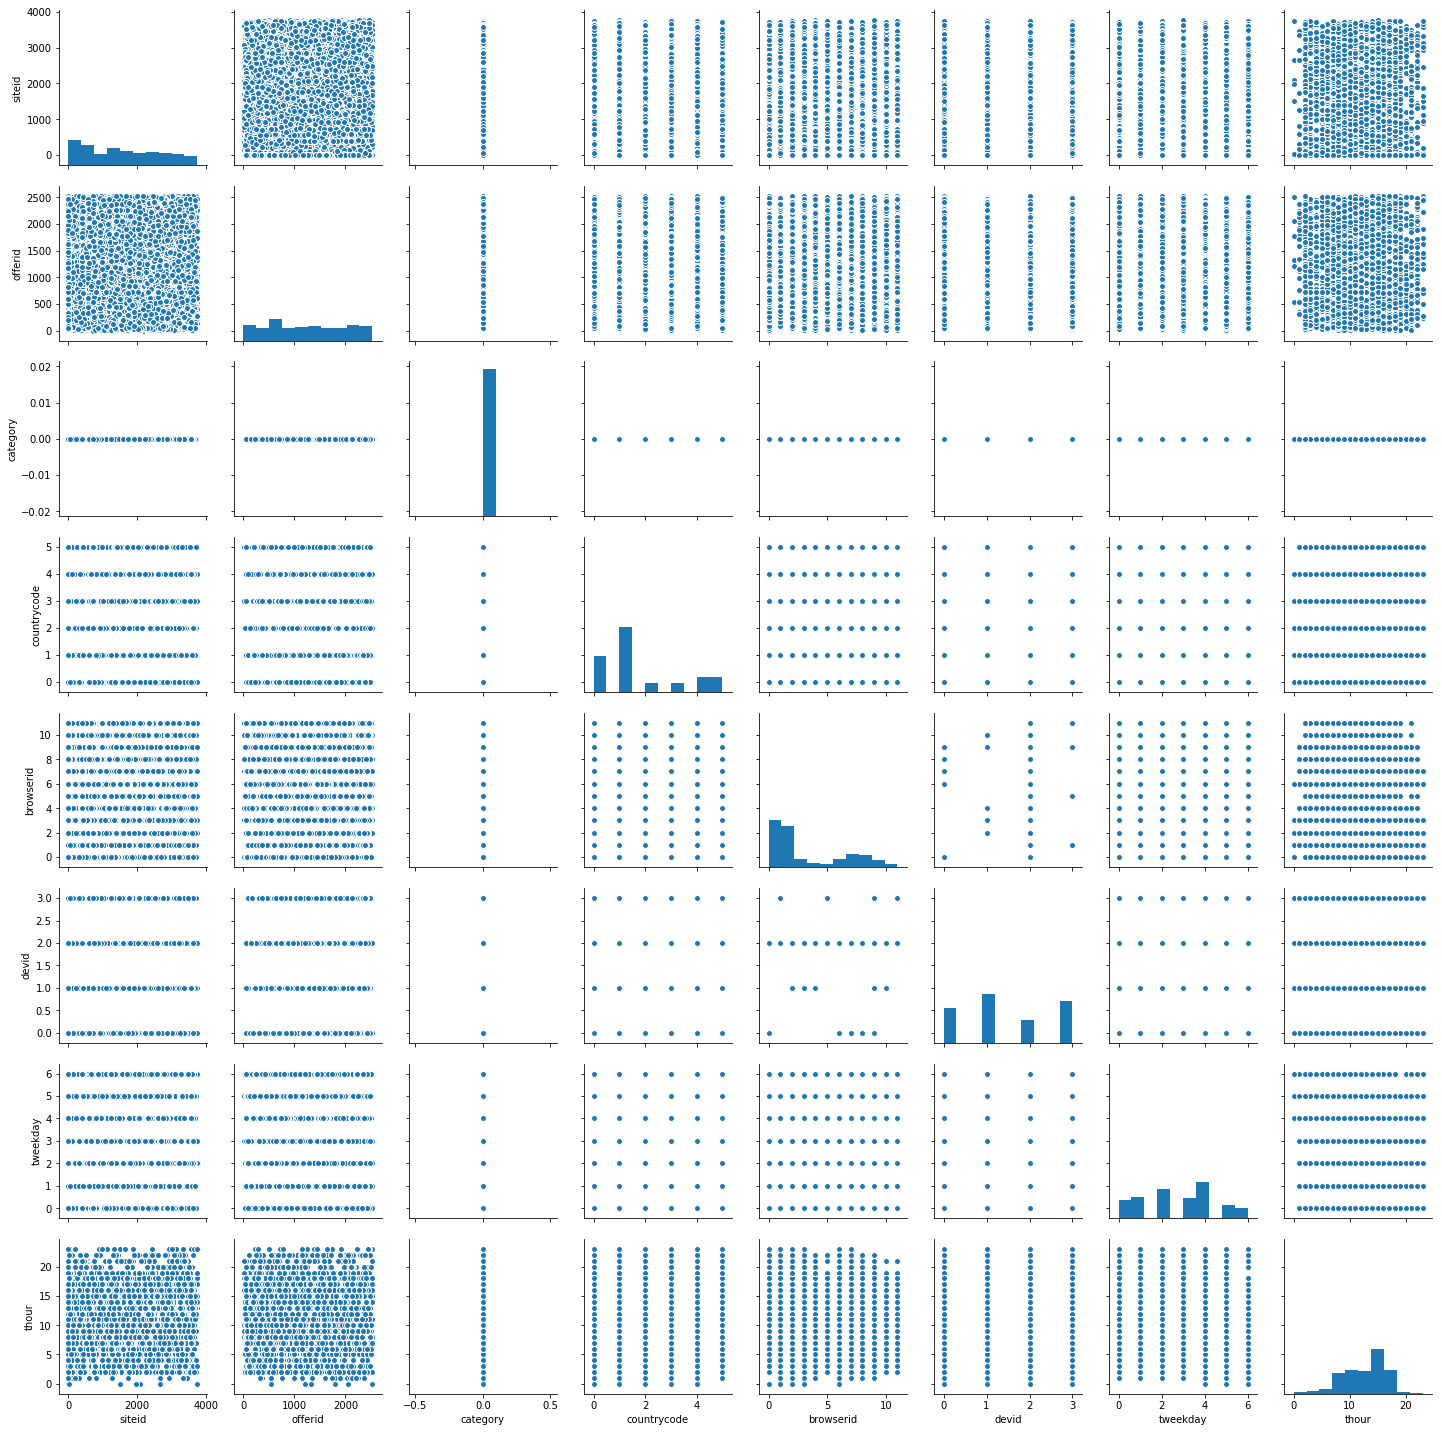

In [21]:
sns.pairplot(features)

In [22]:
features.skew()

siteid         0.196329
offerid        0.058421
category       0.000000
countrycode    0.976677
browserid      0.818462
devid          0.138183
tweekday       0.045951
thour         -0.581345
dtype: float64

(array([5199., 4119., 2278., 3403., 2964., 2422., 2722., 2554., 2328.,
        1931.]),
 array([   0. ,  375.7,  751.4, 1127.1, 1502.8, 1878.5, 2254.2, 2629.9,
        3005.6, 3381.3, 3757. ]),
 <a list of 10 Patch objects>)

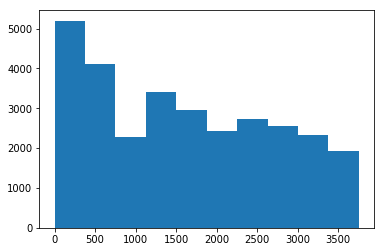

In [23]:
plt.hist(features.siteid)

(array([3137., 2607., 4302., 2540., 2732., 3015., 2639., 2652., 3261.,
        3035.]),
 array([   0. ,  252.8,  505.6,  758.4, 1011.2, 1264. , 1516.8, 1769.6,
        2022.4, 2275.2, 2528. ]),
 <a list of 10 Patch objects>)

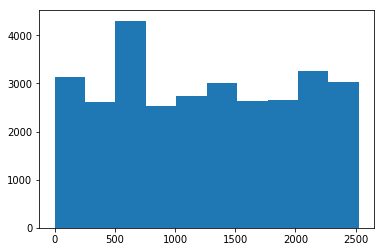

In [24]:
plt.hist(features.offerid)

(array([9494., 8352., 1602.,  860.,  585., 1663., 2768., 2497., 1494.,
         605.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

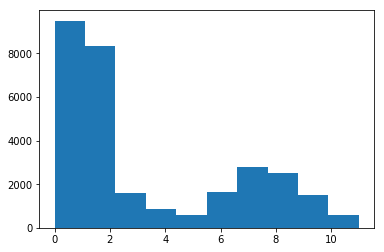

In [25]:
plt.hist(features.browserid)

(array([6977.,    0.,    0., 9910.,    0.,    0., 4526.,    0.,    0.,
        8507.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

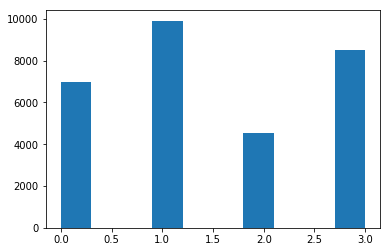

In [26]:
plt.hist(features.devid)

The dataset does not show any significant skewness, so attempt skipping normalization.

## Shuffle and Split Data

All categorical variables have now been converted into numerical features, and all numerical features are already normalized. 

Now split the data (both features and their labels) into training and testing datasets. 80% of the data will be allocated for training and 20% for testing.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

## Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 22440 samples.
Testing set has 7480 samples.


In [28]:
## Import the supervised learning models (Logistic Regression) from sklearn

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [29]:
clf.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
clf_probs = clf.predict_proba(X_test)

In [31]:
clf_probs

array([[0.99459249, 0.00540751],
       [0.97793481, 0.02206519],
       [0.98285664, 0.01714336],
       ...,
       [0.87827968, 0.12172032],
       [0.94743976, 0.05256024],
       [0.98681761, 0.01318239]])

In [32]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, clf_probs[:,1])
print(score)

0.7650246530170447


In [33]:
from sklearn.metrics import roc_curve, auc
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

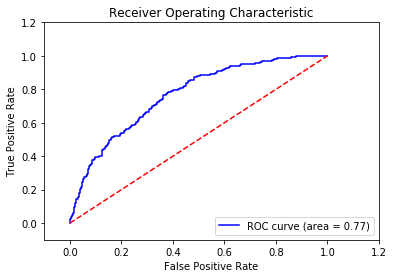

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='ROC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

param = {'C': np.logspace(-3,3), "penalty":["l1","l2"]}
grid_cv = GridSearchCV(estimator=clf, param_grid=param,
                       scoring='roc_auc', cv=10,
                       verbose=True, n_jobs=-1)

## Fit the grid search object to the training data and find the optimal parameters
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.

In [46]:
grid_cv.best_params_

{'C': 0.09102981779915217, 'penalty': 'l1'}

In [47]:
opt_clf = LogisticRegression(C=0.09102981779915217, penalty='l1')

In [48]:
opt_clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.09102981779915217, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
opt_clf_prob = opt_clf.predict_proba(X_test)

In [50]:
opt_score = roc_auc_score(y_test, opt_clf_prob[:,1])
print(opt_score)

0.764669095783343


In [51]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, opt_clf_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

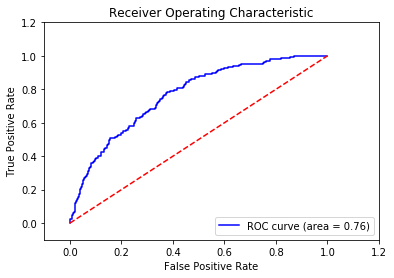

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='ROC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()